### Terminology

- random variable : represents the outcome of a random event.  
- probability : liklihood of an event ; a value from [0,1]

#### Probability Distributions

- the outcomes of an event, the probability of such happening

- a mathematical function
- describe the probability of an outcome (the random variable)
- can be deisplayed as a graph


#### Discrete vs Continuous Variables

- discrete : fixed, defined values
    - number of customer service tickets
    - number of students in a class  
    - number of orders a person makes on Amazon  
    - number of cars on line at a bank  
    
    
- continuous : can take on intermediate values
    - height
    - temperature
    - salaries in a given ZIP code

### Distributions with SciPy

### 4 Distributions

#### Uniform Distribution
- probability in a given event are the same (equal liklihood of each outcome)

#### Binomial Distribution
- exactly 2 outcomes possible (success or failure)
- outcomes not always equal 
    - P(success) = 1 - P(failure)

#### Normal Distribution
- models a _continuous_ random variable
- defined using : mean and standard deviation (68%, 95%, 99.7%)

#### Poisson Distribution
- discrete, random variable
- models the liklihood of a certain number of events occuring in a fixed length of time
    - example : a restaurant serving 20 cumstomers in an hour



[I’m going with you to go home to take the time for your own right after I have been working at this point but]


### Process

1. Determine what we are calculating. Is it a :

- Random variable = given value
- Random variable <= given value
- Random variable >= given value

Start with known probability and determine a value for a random variable.
OR, do the reverse :
Start with a random variable and determine the probability.

2. Determine what we have and what we need to find.

- Find the probability for a given value :
    E.g, What's the liklikhood of having 13 customers ?
- Find the value associated with a probability :
    E.g, What GPA corresponds to top 10% of a class


### Functions

#### Probability Mass Function (PMF)
- For the distribution of a _discrete_ random variable.

#### Probability Density Function (PDF)
- Distribution of a _continuous_ random variable.

#### Cumulative Distribution
- Adding up values up to and including a given value.
- Probability of an outcome OR all of the outcomes below it.
- E.g, everyone with a ticket marked 3 or lower wins (value of 3 or lower, but at most 3).

#### Percent Point Function (PPF)
- Aka, Quantile (aka, a cut-off point, for exemple, in a box plot).
- Return a value of the random variable associated with a given probability.

#### Survival Function (SF)
- Works when the probability of a random variable is GREATER than a given value.
- I.e, what survives afer a certain point, the probability of a variable being greater than the cut-off.

#### Inversse Function (IF)
- Used in same scenario as SF, but...
- Finds the value associated with the probability
- I.e, returns the value corresponding to the probability of survival past the given value.



In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import viz # curriculum viz example code

np.random.seed(123)


### RVS - Random Value Generation

In [4]:
# rvs - random value generation

# Generate random values to reflect rolls of a die

die_distro = stats.randint(1,7)



In [5]:
# no values entered in .rvs()

die_distro.rvs()

6

In [6]:
# specify the size of an array : the number of times the die rolled

die_distro.rvs(5)

array([3, 5, 3, 2, 4])

In [16]:
# matrix, with its dimensions (rwos, columns)

die_distro.rvs((5,5))

array([[2, 2, 4, 4, 3],
       [5, 1, 4, 3, 4],
       [6, 3, 3, 4, 2],
       [4, 2, 4, 4, 4],
       [6, 4, 1, 1, 5]])

In [20]:
# setting number of trials
n = 100000

x = die_distro.rvs(n) 
# holds the vlaues for the simulation, using the number set for 'n'



Text(0.5, 1.0, 'Outcome of 100,000 Dice Rolls')

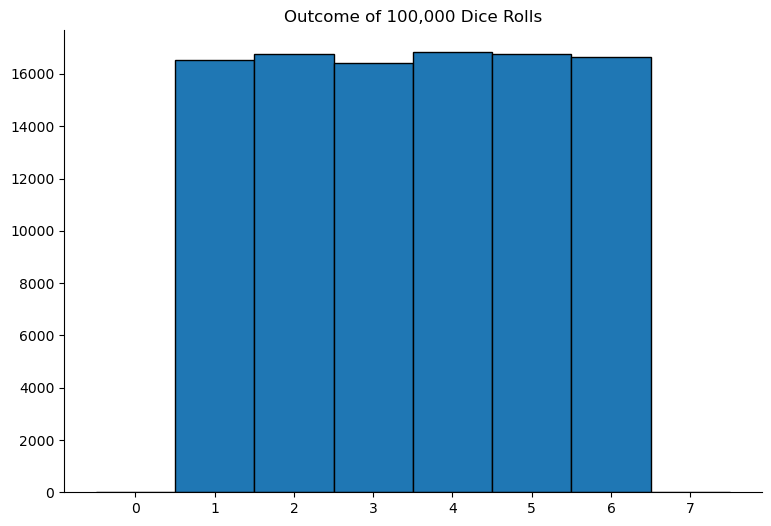

In [21]:
n = 10_0000

x = die_distro.rvs(n)

plt.hist(x, bins=range(0, 9), align='left', width=1, edgecolor='black')
plt.title(f'Outcome of {n:,} Dice Rolls')


𝛼2

### PMF

##### stats.binom.pmf(r, n, p)
The binom.pmf function takes in three parameters:

    n: the total number of trials or times the experiment will be carried out.
    r: a list of integers from 0 to n, inclusive.
    p: the probability that the outcome of a single experiment will be a success.  
       The value of p must be between 0 and 1, inclusive.


In [22]:
# use a MASS function : PMF, to find the probability that a roll = 3

die_distro.pmf(3)

0.16666666666666666

- PMF(2) = 1/6 = 0.1666  
- PMF(6) = 1/6 = 0.1666  

### CDF

In [23]:
# to find the probability of a range of values, up to and including the value (here, 3), use the CDF

die_distro.cdf(3)

0.5

### PPF

##### it returns ... something

a few other friends have said it will help for help in this case to keep your eyes closed so that is not good to know if I was there 

In [35]:
#  use the PPF to find the value associated with 5 divided by 6 
# (5/6, below, is a probability)


die_distro.ppf(5/6)

# it returns ... the cutoff point where 5/6 of the values are lower than the cutoff point : 5

5.0

In [ ]:
# E.g, PPF(1/3) 
# the cutoff where 1/3 of the values are underneath it : 2

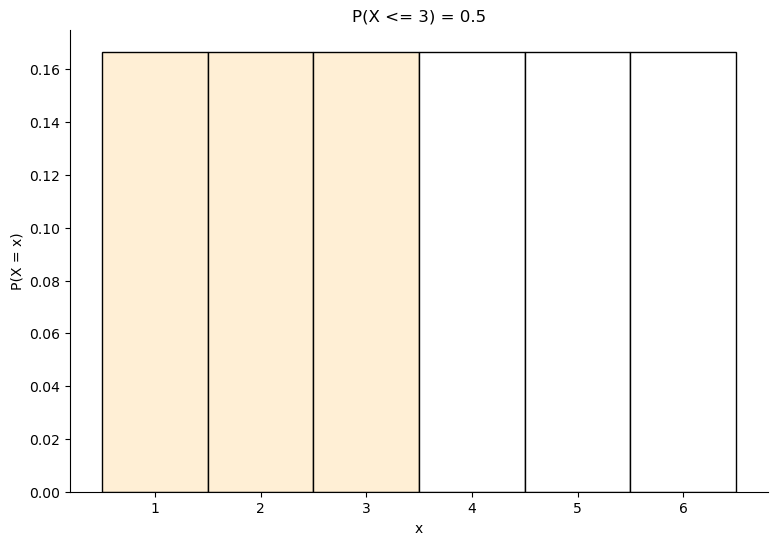

In [26]:
viz.distributions_example1(die_distro)


### SURVIVAL function

In [30]:
# use SURVIVAL function to find liklihood of a roll of higher than 4 (but not including 4)

die_distro.sf(4)

0.33333333333333337

In [ ]:
## the value higher than the cutoff point
## .sf(5) = 1/6 = 0.1333

Or you guys can go for it for the rest and then it is so fun and it’s not a big problem you guys can go for it

(o, 3)

### Use INVERSE SURVIVAL function when...
#### starting with a probability
#### p = 1/3

#### Finding the value of the cut-off point for the probability.
#### * What is the value of which we have exactly a 1/3 chance of being higher ? *

For example, the probability of rolling a 1 is NOT 1/3 ; it is > 1/3, it is 5/6.

p(<2) = p(1) = 1/6 = 0.1666   

p(<5) = p(1) + p(2) + p(3) + p(4) = 4/6 = 1/3 = 0.6666  

p(>4) = p(5) + p(6) = 1/6 + 1/6 = 2/6 = 1/3

In [40]:
die_distro.isf(2/6)

# this returns the value up to the value that we have a 1/3 chance of being greater than.
# we have a 1/3 chance of being greater than 4 (but not including 4)

# P(x > 4)

4.0

SF(4) = ISF(1/3)  

ISF(1/6) = 5. One-sixth of the values are greater than 5.

### Binomial Distribution

In [50]:
### Two outcomes
### Use the probability of success
### Number of trials

### A 30-question test, each with 4 possible answers [p(correct answer) = 0.25 = 1/4]
### The question can be answered either correctly, or incorrectly. There's no mid-correct.

stats.binom(30, 0.25).sf(10)

# returns liklihood of getting MORE THAN 10 questions correct
# SF IGNORES the lower bowndary, in this case, 10 questions

0.10572812269266013

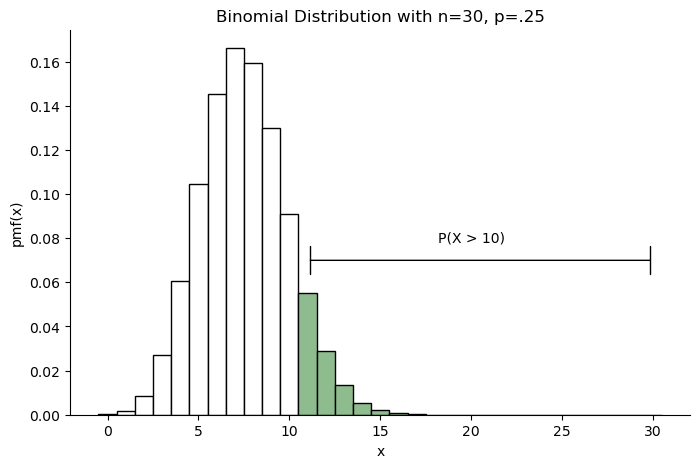

In [53]:
viz.distributions_example4()

In [87]:
### LATE OR ON-TIME

### Binomial question
### 20 students in the class
### P(being late) = 0.05 ///  P(on-time) = 0.95

### Use PMF to give liklihood of someone being late = 0

### Prob of no-one being late

stats.binom(20, 0.05).pmf(0)

0.3584859224085419

In [88]:
stats.binom.pmf(0, 20, 0.05)

# 0 = r
# 20 = n
# 0.05 = p

# same as stats.binom(20, 0.05).pmf(0)

0.3584859224085419

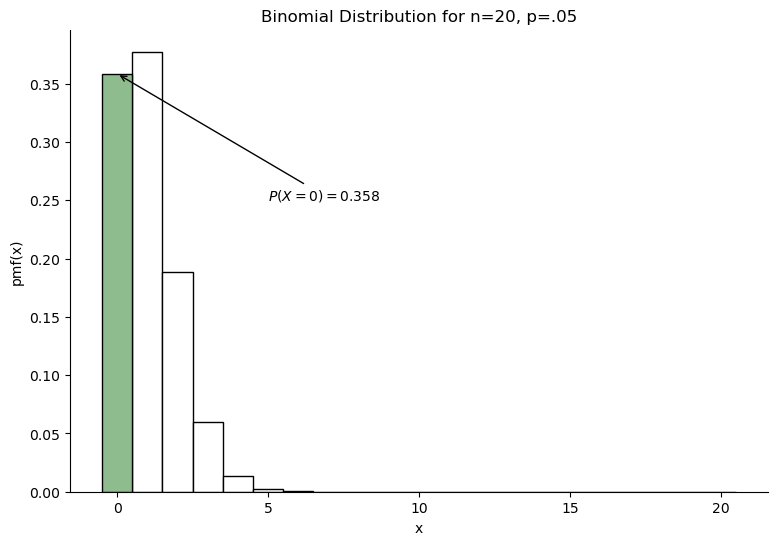

In [55]:
viz.distributions_example5()

In [77]:
# MEAN
µ = 12_000

# Standard deviation
s = 2000

# Define the normal distribution
sales = stats.norm(µ, s)


## Find the value where 90% of the values / variables are less than unknown-value-X : Use PPF.

top_10_pc_cutoff = sales.ppf(0.9)
# unknown value : what is cutoff point / interval for the top 10% of earners ?

# Use the PPF to find the cutt-off where 90% of the data are less than the cut-off


print('${:,.2f}'.format(top_10_pc_cutoff))

$14,563.10


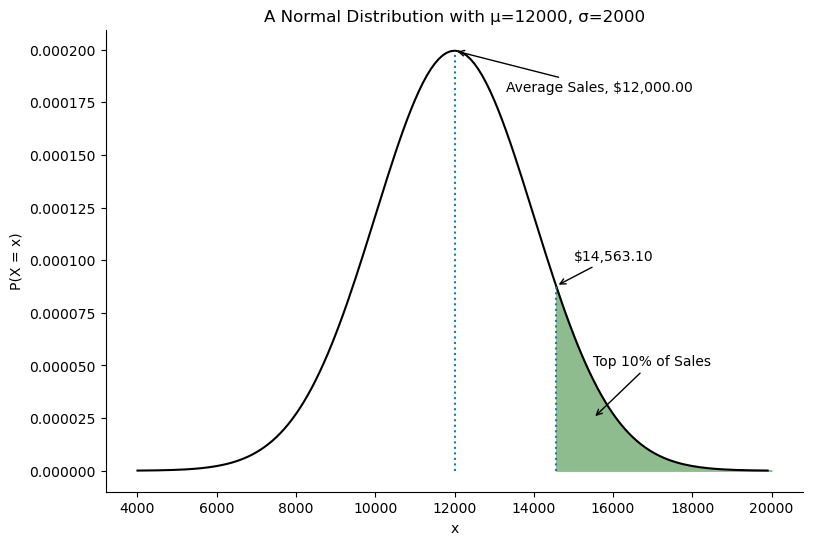

In [75]:
viz.distributions_example7(µ,s)

In [79]:
### Find the probability that sales < $ 10 000

## Cumulative : CDF

p = sales.cdf(10_000)
p

0.15865525393145707

### Poisson vs Normal Distribution

...